In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA, NMF
from sklearn.metrics import accuracy_score

# iris 데이터셋 로드
iris = datasets.load_iris()
X, y = iris.data, iris.target


In [9]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 정확도 출력
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("랜덤 포레스트 정확도:", accuracy)


랜덤 포레스트 정확도: 1.0


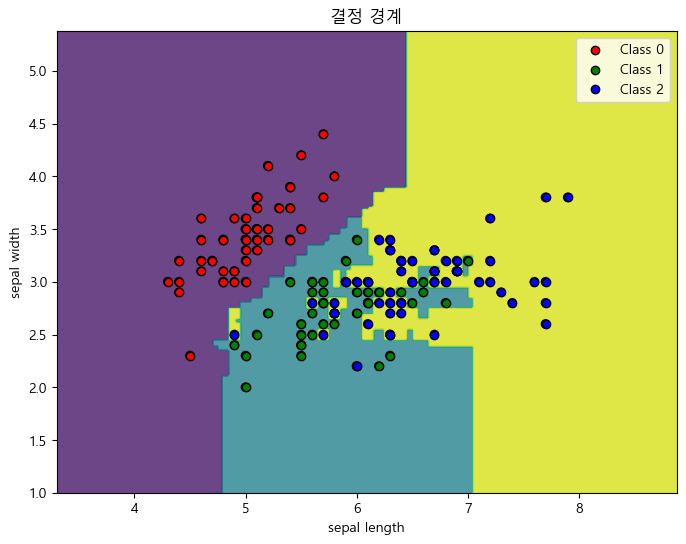

In [14]:
# 각 클래스에 대한 색상 지정
colors = ['red', 'green', 'blue']

# 데이터셋의 두 개 특성만 사용하여 결정 경계 그리기
X_2d = X[:, :2]
rf_model.fit(X_2d, y)
plt.figure(figsize=(8, 6))
plot_decision_boundary(rf_model, X_2d, y)

# 클래스에 따라 다른 색상으로 데이터 포인트 그리기
for i in range(3):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=colors[i], edgecolors='k', label=f'Class {i}')


plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('결정 경계')
plt.rc('font', family='Malgun Gothic') #한글폰트
plt.legend()
plt.show()


In [5]:
# 랜덤 포레스트의 특성 중요도 출력
importance = rf_model.feature_importances_
feature_names = iris.feature_names
print("랜덤 포레스트의 특성 중요도:")
for name, importance in zip(feature_names, importance):
    print(f"{name}: {importance}")


랜덤 포레스트의 특성 중요도:
sepal length (cm): 0.6397293946832497
sepal width (cm): 0.3602706053167502


In [6]:
# PCA 모델 생성 및 적용
pca_model = PCA(n_components=2)
X_pca = pca_model.fit_transform(X)

# 성분 출력
print("PCA 결과:")
print(X_pca)


PCA 결과:
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.86624165  0.06936447]
 [-2.62523805  0.599

In [7]:
# NMF 모델 생성 및 적용
nmf_model = NMF(n_components=2)
X_nmf = nmf_model.fit_transform(X)

# 성분 출력
print("NMF 결과:")
print(X_nmf)


NMF 결과:
[[0.41356229 0.10457618]
 [0.36548759 0.14091832]
 [0.37785481 0.10179942]
 [0.35001275 0.14891411]
 [0.41596217 0.09520372]
 [0.42883481 0.15685741]
 [0.37639076 0.11399586]
 [0.39328771 0.13131687]
 [0.332166   0.14127353]
 [0.36932356 0.14435826]
 [0.43656266 0.11371963]
 [0.375413   0.14868511]
 [0.36418392 0.13035097]
 [0.36111825 0.06171462]
 [0.50254004 0.03500042]
 [0.49719808 0.08127016]
 [0.4591047  0.07536144]
 [0.40971235 0.11364065]
 [0.44059212 0.16017114]
 [0.42480536 0.11040591]
 [0.39876724 0.17807635]
 [0.41340192 0.12733996]
 [0.42561759 0.00769626]
 [0.36420305 0.20863073]
 [0.35271058 0.20980709]
 [0.35550626 0.18316918]
 [0.37802034 0.16981981]
 [0.41114844 0.12645304]
 [0.41116242 0.11394863]
 [0.35515239 0.1629214 ]
 [0.35275252 0.17229385]
 [0.40620229 0.15545732]
 [0.46031935 0.0701711 ]
 [0.48705122 0.05550062]
 [0.36547361 0.15342273]
 [0.40088314 0.08593405]
 [0.44174424 0.09021368]
 [0.4146585  0.08463637]
 [0.34728697 0.11302996]
 [0.39844133 0.13

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


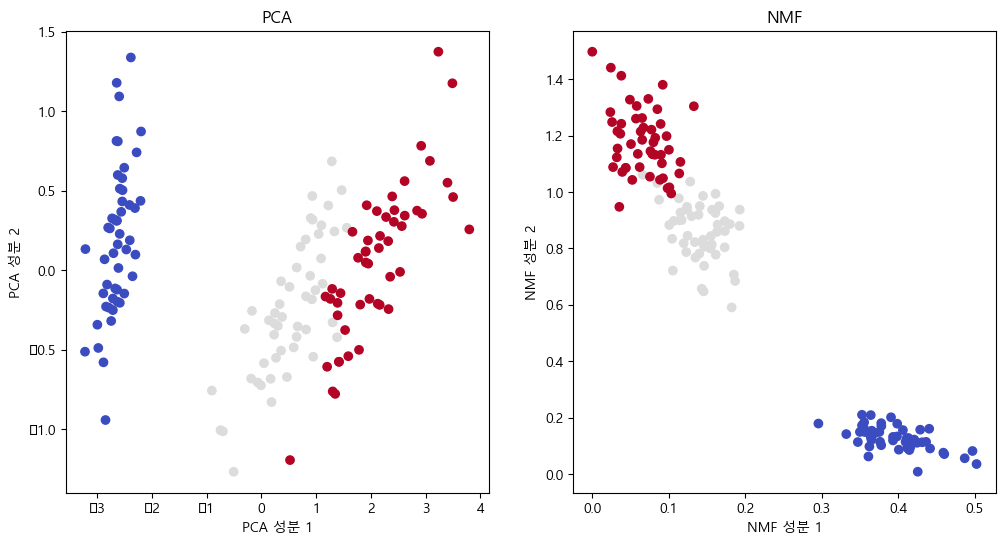

In [15]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (맑은 고딕)
plt.rcParams["font.family"] = "Malgun Gothic"

# PCA와 NMF의 성분 산점도 그리기
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm')  # 파란색-빨간색 컬러맵 사용
plt.xlabel('PCA 성분 1')
plt.ylabel('PCA 성분 2')
plt.title('PCA')

plt.subplot(1, 2, 2)
plt.scatter(X_nmf[:, 0], X_nmf[:, 1], c=y, cmap='coolwarm')  # 파란색-빨간색 컬러맵 사용
plt.xlabel('NMF 성분 1')
plt.ylabel('NMF 성분 2')
plt.title('NMF')

plt.show()


In [16]:
# 랜덤 포레스트의 특성 중요도 출력
importance = rf_model.feature_importances_
feature_names = iris.feature_names
print("랜덤 포레스트의 특성 중요도:")
for name, importance in zip(feature_names, importance):
    print(f"{name}: {importance}")


랜덤 포레스트의 특성 중요도:
sepal length (cm): 0.6397293946832497
sepal width (cm): 0.3602706053167502


In [17]:
# PCA 모델 생성 및 적용
pca_model = PCA(n_components=2)
X_pca = pca_model.fit_transform(X)

# 성분 출력
print("PCA 결과:")
print(X_pca)


PCA 결과:
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.86624165  0.06936447]
 [-2.62523805  0.599

In [19]:
# NMF 모델 생성 및 적용
nmf_model = NMF(n_components=2)
X_nmf = nmf_model.fit_transform(X)

# 성분 출력
print("NMF 결과:")
print(X_nmf)


NMF 결과:
[[0.41356229 0.10457618]
 [0.36548759 0.14091832]
 [0.37785481 0.10179942]
 [0.35001275 0.14891411]
 [0.41596217 0.09520372]
 [0.42883481 0.15685741]
 [0.37639076 0.11399586]
 [0.39328771 0.13131687]
 [0.332166   0.14127353]
 [0.36932356 0.14435826]
 [0.43656266 0.11371963]
 [0.375413   0.14868511]
 [0.36418392 0.13035097]
 [0.36111825 0.06171462]
 [0.50254004 0.03500042]
 [0.49719808 0.08127016]
 [0.4591047  0.07536144]
 [0.40971235 0.11364065]
 [0.44059212 0.16017114]
 [0.42480536 0.11040591]
 [0.39876724 0.17807635]
 [0.41340192 0.12733996]
 [0.42561759 0.00769626]
 [0.36420305 0.20863073]
 [0.35271058 0.20980709]
 [0.35550626 0.18316918]
 [0.37802034 0.16981981]
 [0.41114844 0.12645304]
 [0.41116242 0.11394863]
 [0.35515239 0.1629214 ]
 [0.35275252 0.17229385]
 [0.40620229 0.15545732]
 [0.46031935 0.0701711 ]
 [0.48705122 0.05550062]
 [0.36547361 0.15342273]
 [0.40088314 0.08593405]
 [0.44174424 0.09021368]
 [0.4146585  0.08463637]
 [0.34728697 0.11302996]
 [0.39844133 0.13

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


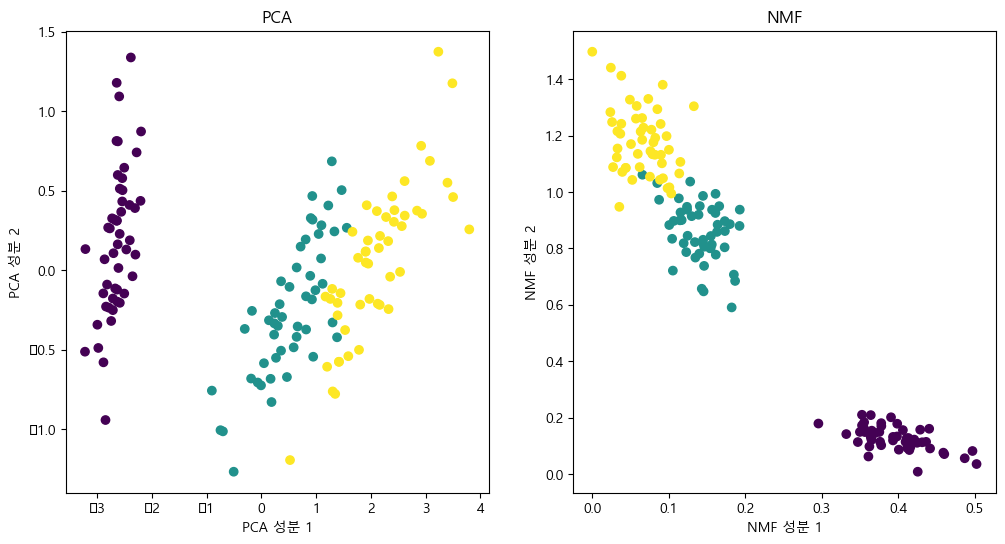

In [20]:
# PCA와 NMF의 성분 산점도 그리기
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('PCA 성분 1')
plt.ylabel('PCA 성분 2')
plt.title('PCA')

plt.subplot(1, 2, 2)
plt.scatter(X_nmf[:, 0], X_nmf[:, 1], c=y)
plt.xlabel('NMF 성분 1')
plt.ylabel('NMF 성분 2')
plt.title('NMF')

plt.show()
